In [1]:
import pgmpy as pg
from pgmpy.readwrite import BIFReader
from pgmpy.base import UndirectedGraph
import itertools
import networkx as nx

In [2]:
data = BIFReader("./data/burglar.bif")

In [3]:

# return all the set of vertices adjacent to a or b in graph G not including a and b. 
def get_AG(G, a, b):
    neighborsA = list(G.neighbors(a))     
    neighborsB = list(G.neighbors(b))
    unique = list(set(neighborsA + neighborsB))
    if a in unique:
        unique.remove(a)
    if b in unique:
        unique.remove(b)
    return unique

def I(G, a, S, b):
    # print(list(S))
    tmpG = G.copy()
    for node in S:
        tmpG.remove_node(node)
    try:
        shortestPath = nx.shortest_path(tmpG, source=a, target=b)
        # print("Shortest Path between ", a, " and ", b, "-> ", shortestPath)
        return len(shortestPath) == 0
    except:
        return True

Graph with 5 nodes and 10 edges


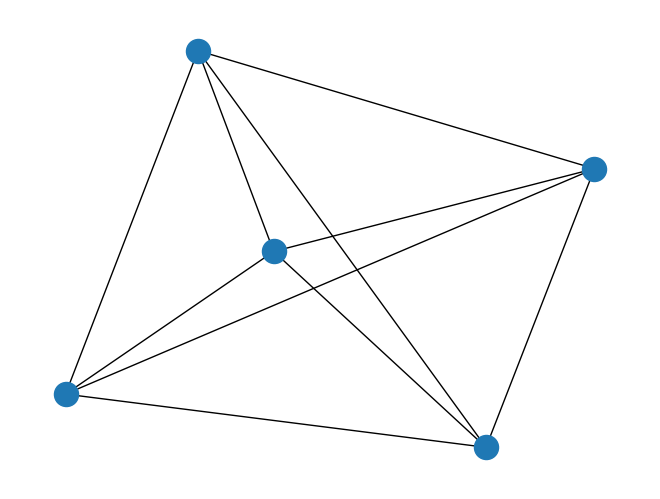

In [4]:
# Inizializing variables
# inital nodes
Z = data.get_values().keys()
# parents of node i-th
pi = data.get_parents()
# initial graph 
G1 = nx.Graph()
# adding nodes
G1.add_nodes_from(Z)
edges = itertools.combinations(Z, 2)
edges = list(edges)
G1.add_edges_from(edges)
# order is ord because ord is a keyword in python
order = 0
old_pi = {}
for node in Z:
    old_pi[node] = []
old_prob = 0
u = 15


# point 2
Sab = {}
for (a,b) in G1.edges:
    # print("Nodes: ", a, " and ", b)
    # unique nodes adjacet to a or b
    order = 0
    unique = get_AG(G1, a, b)    
    while(order <= len(unique)):
        # print("Order: ", order, ". Unique: ", unique)
        for subset in itertools.combinations(unique, order):
            # print("Subset: ", subset)
            if I(G1, a, subset, b):
                # print(a, b, " independent")
                G1.remove_edge(a, b)
                Sab[a + b] = subset
                order = len(unique) + 1
                break
        order = order + 1
print(G1)
nx.draw(G1)

{'BURGLARY': set(), 'EARTHQUAKE': set(), 'ALARM': set(), 'JOHNCALLS': set(), 'MARYCALLS': set()}


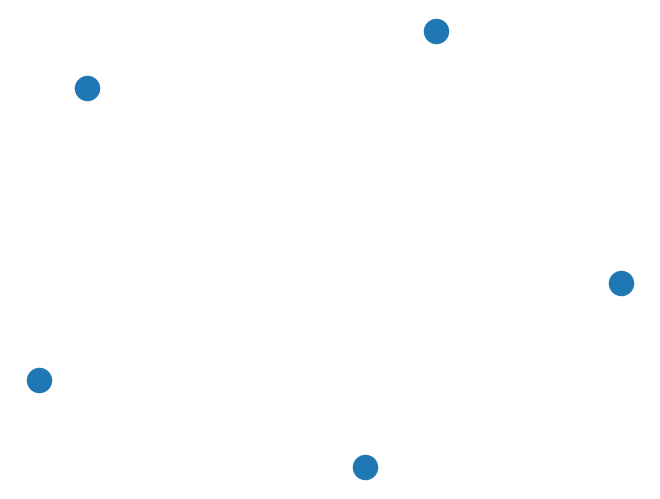

In [5]:
# point 3
G = G1.copy().to_directed()
not_adjacents_all = {}

directedG = nx.DiGraph()
# adding nodes
directedG.add_nodes_from(Z)

for node in Z:
    neighbors = list(G.neighbors(node))
    not_adjacents_all[node] = (Z - neighbors) - set([node])

print(not_adjacents_all)
for (a, not_adjacent_node) in not_adjacents_all.items():
    for b in not_adjacent_node:
        common = G.neighbors(a).intersection(G.neighbors(b))
        print(common)
        for c in common:
            print(S[a+b])
            if c not in S[a + b]:
                directedG.add_edge(a,c)
                directedG.add_edge(b,c)
                if nx.cycles(directedG):
                    directedG.remove_edge(a,c)
                    directedG.remove_edge(b,c)
                
# nx.draw_shell(directedG)
nx.draw(directedG)

In [ ]:
def SGS(a, b, ord):
    return 0